### This code is designed to study the trend and forecast of TB Case Detection Rate in Ethiopia
##### Regression models most notably linear regression and Polynomial regression will be used

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# read the source file and investigate
dataset = pd.read_csv('data/Estimate using GBD.csv')

In [3]:
X = dataset.iloc[:,0:-1].values
y = dataset.iloc[:,-1].values

In [4]:
y

array([17.91, 57.02, 18.66, 16.92, 18.5 , 20.19, 22.04, 23.15, 24.7 ,
       73.92, 67.01, 59.82, 68.03, 63.67, 57.32, 52.15])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#lr.fit(X_train, y_train)
#y_pred = lr.predict(X_test)

In [ ]:
# Let us visualize the result
plt.scatter(X, y, color='red')
plt.scatter(X_test, y_pred, color='green')
plt.plot(X, lr.predict(X), color='blue')
plt.title("TB Detection Rate-ETHIOPIA (WHO DATA)")
plt.xlabel('Year')
plt.ylabel('Detection Rate')
plt.legend()
plt.show()

In [ ]:
# Let us visualize the forecast upto 2030
X_forecast = list(range(2022,2031))
X_forecast = np.array(X_forecast).reshape(len(X_forecast),1)
plt.scatter(X, y, color='red')
plt.scatter(X_test, y_pred, color='green')
plt.plot(X, lr.predict(X), color='blue')
plt.plot(X_forecast, lr.predict(X_forecast), color='red',label='Forecast')
plt.title("TB Detection Rate-ETHIOPIA (WHO DATA)")
plt.xlabel('Year')
plt.ylabel('Detection Rate')
plt.legend()
plt.show()

In [6]:
# Degree 8 polynomial
poly_features_8 = PolynomialFeatures(degree=8)
X_poly_8 = poly_features_8.fit_transform(X_train)
lr_deg8 = LinearRegression()
lr_deg8.fit(X_poly_8,y_train)

LinearRegression()

In [7]:
y_pred = lr_deg8.predict(poly_features_8.transform(X_test))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


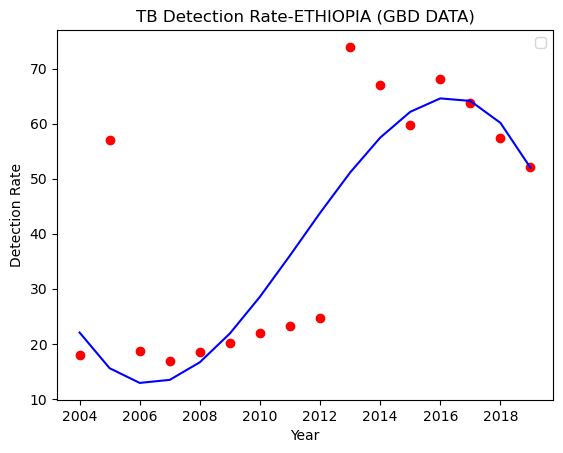

In [8]:
# Let us visualize the data with 2 degree polynomial regression
plt.scatter(X, y, color='red')
plt.plot(X, lr_deg8.predict(poly_features_8.transform(X)), color='blue')
plt.title("TB Detection Rate-ETHIOPIA (GBD DATA)")
plt.xlabel('Year')
plt.ylabel('Detection Rate')
plt.legend()
plt.show()

In [9]:
# Let us do the forecast using degree 6 polynomial regression
X_forecast6 = list(range(2021,2031))
X_forecast6 = np.array(X_forecast6).reshape(len(X_forecast6),1)

# Degree 6 polynomial
poly_features_8 = PolynomialFeatures(degree=8)
X_poly_8 = poly_features_8.fit_transform(X)
lr_deg8 = LinearRegression()
lr_deg8.fit(X_poly_8,y)

LinearRegression()

In [10]:
from sklearn.metrics import r2_score
r2_score(y_pred, y_test)

-2.500290310940793

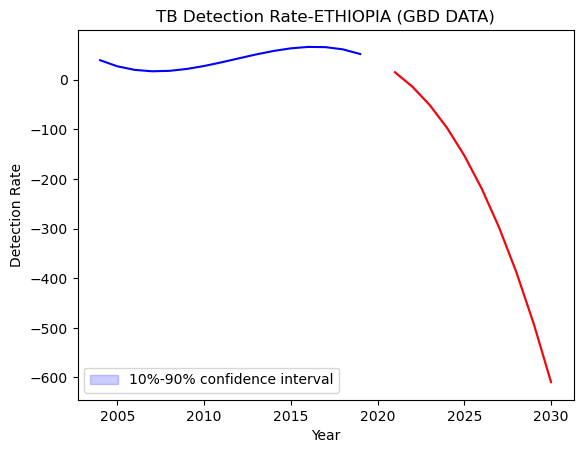

In [11]:
# Let us visualize the forecast upto 2030
# Using the degree 6 polynomial regression model
# plt.scatter(X_test, y_pred, color='green')
x = X_forecast6.ravel()
y = lr_deg8.predict(poly_features_8.fit_transform(X_forecast6))
ci =  np.std(y) / np.mean(y)

plt.plot(X, lr_deg8.predict(poly_features_8.fit_transform(X)), color='blue')
# plt.plot(X_forecast6, lr_deg6.predict(poly_features_6.fit_transform(X_forecast6)), color='red',label='Forecast')
plt.plot(x, y, color='red')
plt.fill_between(x, (y-2*ci), (y+2*ci), alpha=0.2, label=f'10%-90% confidence interval', color='blue')
plt.title("TB Detection Rate-ETHIOPIA (GBD DATA)")
plt.xlabel('Year')
plt.ylabel('Detection Rate')
plt.legend()
plt.show()

In [ ]:
# Let us visualize the forecast upto 2030
# Using the degree 6 polynomial regression model
# plt.scatter(X_test, y_pred, color='green')
x = X_forecast6.ravel()
y = lr_deg6.predict(poly_features_6.fit_transform(X_forecast6))

plt.figure(figsize=(10,5))
plt.grid(color='lightgray', alpha=0.5, zorder=1)
plt.plot(X_forecast6, lr_deg6.predict(poly_features_6.fit_transform(X_forecast6)), marker='o', color='red',label='Forecast')
plt.plot(X, lr_deg6.predict(poly_features_6.fit_transform(X)), marker='o', color='blue', label='Past Trend')
plt.fill_between(x, y-70*ci, y+70*ci, alpha=.5, label=f'95% confidence interval', color='lightblue')
plt.title("TB Detection Rate-ETHIOPIA (WHO DATA)")
plt.axhline(y=81, linestyle='dashed', color='navy',label='HSTP-II Target (2024/25)')
plt.axhline(y=76, linestyle='dashed', color='darkred', label='HSTP-II Mid-term Target (2022/23)')
plt.axhline(y=90, linestyle='dashed', color='limegreen', label='End TB Target (2030)')
plt.xlabel('Year')
plt.ylabel('Detection Rate')
plt.legend(loc='lower right')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [ ]:
import scipy.stats as st
st.norm.interval(confidence=0.95,
                 loc=np.mean(y),
                 scale=st.sem(y))

In [ ]:
y[0]